In [2]:
import pandas as pd
file_path = '../result/error_analysis_level_3.csv'  
df = pd.read_csv(file_path, sep=',')

In [3]:
# Filtering the dataset to include only rows where there is a disagreement between labels_info and prediction_level_3
error_analysis = df[df['labels_info'] != df['prediction_level_3']]

# Saving the filtered data to a new CSV file
error_file_path = '../error_analysis/filtered_error_analysis.csv'
error_analysis.to_csv(error_file_path, index=False)

error_file_path

'../error_analysis/filtered_error_analysis.csv'

In [4]:
import numpy as np

# Ensure reproducibility by setting a random seed
np.random.seed(0)

# Randomly select 385 samples from the error_analysis dataset
sampled_errors = error_analysis.sample(n=385, random_state=0)



In [7]:
sampled_error_file_path = '../error_analysis/sampled_error_analysis.csv'
sampled_errors.to_csv(sampled_error_file_path, index=False)

### confusion_matrix, classification_report

In [54]:
import os
from sklearn.metrics import classification_report
# Base directory where the files are located
base_dir = '../result/'

# File names for all six CSV files
file_names = [
    'multiclass_1.csv',
    'multiclass_2.csv',
    'multiclass_3.csv',
    'binary_1.csv',
    'binary_2.csv',
    'binary_3.csv'
]

# Create a dictionary to hold the dataframes
dfs = {}

# Loop through each file name and read the file into a pandas DataFrame
for file_name in file_names:
    # Construct the full file path
    file_path = os.path.join(base_dir, file_name)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Add the DataFrame to the dictionary using the name as the key
    dfs[file_name] = df

# Now we have a dictionary where each key is the file name and each value is the corresponding DataFrame
dfs.keys()


dict_keys(['multiclass_1.csv', 'multiclass_2.csv', 'multiclass_3.csv', 'binary_1.csv', 'binary_2.csv', 'binary_3.csv'])

In [55]:
# Since we are going to use a conditional approach to handle different column names for predictions,
# we will create a function to extract true labels and predicted labels based on the file naming convention.

def extract_labels(df, file_name):
    # Check if the file name suggests which level of prediction we should use
    if 'multiclass_1' in file_name:
        predicted_column = 'prediction_level_1'
    elif 'multiclass_2' in file_name:
        predicted_column = 'prediction_level_2'
    elif 'multiclass_3' in file_name:
        predicted_column = 'prediction_level_3'
    elif 'binary_1' in file_name:
        predicted_column = 'prediction_level_1'
    elif 'binary_2' in file_name:
        predicted_column = 'prediction_level_2'
    elif 'binary_3' in file_name:
        predicted_column = 'prediction_level_3'
    else:
        # Default to a generic column name if not found
        predicted_column = 'prediction'
    
    # Extract the true labels and the predicted labels
    true_labels = df['labels_info']
    predicted_labels = df[predicted_column]
    
    return true_labels, predicted_labels

for file_name, df in dfs.items():
    true_labels, predicted_labels = extract_labels(df, file_name)
    # For demonstration, we will just print out the length of each to confirm it's working
    print(f"{file_name}: True Labels - {len(true_labels)}, Predicted Labels - {len(predicted_labels)}")



multiclass_1.csv: True Labels - 5307, Predicted Labels - 5307
multiclass_2.csv: True Labels - 5307, Predicted Labels - 5307
multiclass_3.csv: True Labels - 5307, Predicted Labels - 5307
binary_1.csv: True Labels - 5307, Predicted Labels - 5307
binary_2.csv: True Labels - 5307, Predicted Labels - 5307
binary_3.csv: True Labels - 5307, Predicted Labels - 5307


In [42]:
def extract_labels(df, file_name):
    # Extracting the level from the file name (assuming format like 'multiclass_1.csv')
    if 'multiclass' in file_name or 'binary' in file_name:
        level = file_name.split('_')[1].split('.')[0]  # This will extract the number after '_'
        predicted_column = f'prediction_level_{level}'
    else:
        # Default to a generic column name if not found
        predicted_column = 'prediction'
    
    true_labels = df['labels_info']
    predicted_labels = df[predicted_column]

    # Filter out 'CounterSpeech' if it's a multiclass dataset
    if 'multiclass' in file_name:
        mask = true_labels != 'CounterSpeech'
        true_labels = true_labels[mask]
        predicted_labels = predicted_labels[mask]
    
    return true_labels, predicted_labels


for file_name, df in dfs.items():
    true_labels, predicted_labels = extract_labels(df, file_name)
    # For demonstration, we will just print out the length of each to confirm it's working
    print(f"{file_name}: True Labels - {len(true_labels)}, Predicted Labels - {len(predicted_labels)}")


multiclass_1.csv: True Labels - 5307, Predicted Labels - 5307
multiclass_2.csv: True Labels - 5307, Predicted Labels - 5307
multiclass_3.csv: True Labels - 5307, Predicted Labels - 5307
binary_1.csv: True Labels - 5307, Predicted Labels - 5307
binary_2.csv: True Labels - 5307, Predicted Labels - 5307
binary_3.csv: True Labels - 5307, Predicted Labels - 5307


In [56]:
from sklearn.metrics import confusion_matrix, classification_report

# Dictionary to hold the confusion matrices and classification reports
conf_matrices = {}
class_reports = {}

# Loop through each DataFrame, compute the confusion matrix and classification report
for file_name, df in dfs.items():
    true_labels, predicted_labels = extract_labels(df, file_name)
    
    # Compute the confusion matrix and classification report
    conf_matrices[file_name] = confusion_matrix(true_labels, predicted_labels)
    class_reports[file_name] = classification_report(true_labels, predicted_labels)

# Now you have dictionaries with confusion matrices and classification reports
# You can print them out or process them further as needed
for file_name in file_names:
    print(f"Confusion Matrix for {file_name}:\n{conf_matrices[file_name]}\n")
    print(f"Classification Report for {file_name}:\n{class_reports[file_name]}\n")

Confusion Matrix for multiclass_1.csv:
[[  90   16   84   15]
 [  43  175  242   54]
 [ 156  151 3947  153]
 [   8   13   89   71]]

Classification Report for multiclass_1.csv:
                          precision    recall  f1-score   support

AffiliationDirectedAbuse       0.30      0.44      0.36       205
   IdentityDirectedAbuse       0.49      0.34      0.40       514
                 Neutral       0.90      0.90      0.90      4407
     PersonDirectedAbuse       0.24      0.39      0.30       181

                accuracy                           0.81      5307
               macro avg       0.49      0.52      0.49      5307
            weighted avg       0.82      0.81      0.81      5307


Confusion Matrix for multiclass_2.csv:
[[  93   26   95   22]
 [  33  133  229   42]
 [ 109  185 3975  134]
 [  11   25  108   87]]

Classification Report for multiclass_2.csv:
                          precision    recall  f1-score   support

AffiliationDirectedAbuse       0.38      0.39  

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Dictionary to hold the confusion matrices and classification reports
conf_matrices = {}
class_reports = {}

# Loop through each DataFrame, compute the confusion matrix and classification report
for file_name, df in dfs.items():
    true_labels, predicted_labels = extract_labels(df, file_name)
    
    # Compute the confusion matrix and classification report
    conf_matrices[file_name] = confusion_matrix(true_labels, predicted_labels)
    class_reports[file_name] = classification_report(true_labels, predicted_labels)

# Now you have dictionaries with confusion matrices and classification reports
# You can print them out or process them further as needed
for file_name in file_names:
    print(f"Confusion Matrix for {file_name}:\n{conf_matrices[file_name]}\n")
    print(f"Classification Report for {file_name}:\n{class_reports[file_name]}\n")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

Confusion Matrix for multiclass_1.csv:
[[ 114    0   36   90   18]
 [   4    0   17   41    4]
 [  47    0  220  267   56]
 [ 149    0  194 3892  109]
 [  14    0   25  112   86]]

Classification Report for multiclass_1.csv:
                          precision    recall  f1-score   support

AffiliationDirectedAbuse       0.35      0.44      0.39       258
           CounterSpeech       0.00      0.00      0.00        66
   IdentityDirectedAbuse       0.45      0.37      0.41       590
                 Neutral       0.88      0.90      0.89      4344
     PersonDirectedAbuse       0.32      0.36      0.34       237

                accuracy                           0.78      5495
               macro avg       0.40      0.41      0.40      5495
            weighted avg       0.78      0.78      0.78      5495


Confusion Matrix for multiclass_2.csv:
[[ 121    0   22   92   23]
 [   5    0   20   37    4]
 [  49    0  214  271   56]
 [ 128    0  188 3934   94]
 [  15    0   23  121   78

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Function to process the dataframes and generate confusion matrices and classification reports excluding 'CounterSpeech'
def process_dataframes(dfs):
    conf_matrices = {}
    class_reports = {}
    
    for file_name, df in dfs.items():
        # Use the previously defined function to extract true and predicted labels
        true_labels, predicted_labels = extract_labels(df, file_name)
        
        # Filter out 'CounterSpeech' from the data
        mask = true_labels != 'CounterSpeech'
        filtered_true_labels = true_labels[mask]
        filtered_predicted_labels = predicted_labels[mask]
        
        # Compute the confusion matrix and classification report without 'CounterSpeech'
        conf_matrices[file_name] = confusion_matrix(filtered_true_labels, filtered_predicted_labels)
        class_reports[file_name] = classification_report(filtered_true_labels, filtered_predicted_labels, output_dict=True)
    
    return conf_matrices, class_reports

# Process the dataframes
conf_matrices, class_reports = process_dataframes(dfs)

# Now, let's visualize the confusion matrix for one of the files using seaborn
def plot_confusion_matrix(conf_matrix, classes, file_name):
    # Convert the confusion matrix to a DataFrame
    df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)
    
    plt.figure(figsize=(4, 2))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {file_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Since 'CounterSpeech' class is removed, we exclude it from the labels
labels = ['AffiliationDirectedAbuse', 'IdentityDirectedAbuse', 'Neutral', 'PersonDirectedAbuse']

# Plot the confusion matrix for 'base_result1.csv' as an example
#plot_confusion_matrix(conf_matrices['base_result1.csv'], labels, 'base_result1.csv')
conf_matrices


{'base_result1.csv': array([[ 114,   36,   90,   18],
        [  47,  220,  267,   56],
        [ 149,  194, 3892,  109],
        [  14,   25,  112,   86]], dtype=int64),
 'base_result2.csv': array([[ 121,   22,   92,   23],
        [  49,  214,  271,   56],
        [ 128,  188, 3934,   94],
        [  15,   23,  121,   78]], dtype=int64),
 'base_result3.csv': array([[ 104,   37,   95,   22],
        [  26,  283,  241,   40],
        [ 109,  264, 3878,   93],
        [  12,   40,  113,   72]], dtype=int64),
 'error_analysis_level_1.csv': array([[ 582,  315],
        [ 859, 3551]], dtype=int64),
 'error_analysis_level_2.csv': array([[ 647,  259],
        [1106, 3295]], dtype=int64),
 'error_analysis_level_3.csv': array([[ 662,  244],
        [1158, 3243]], dtype=int64)}

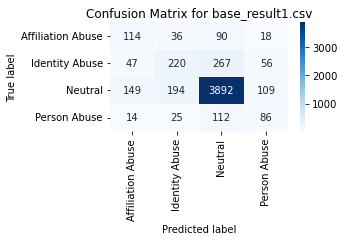

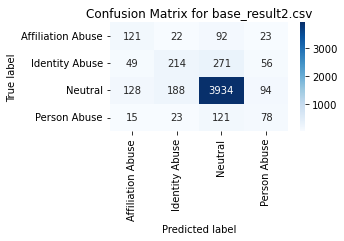

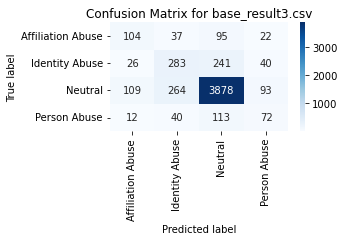

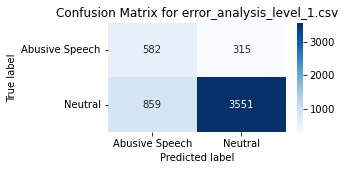

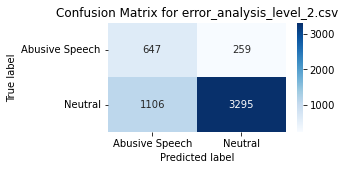

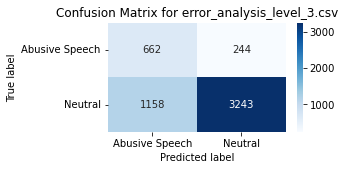

In [24]:
multiclass_classes = ['Affiliation Abuse', 'Identity Abuse', 'Neutral', 'Person Abuse']

# Class names for binary classification models
binary_classes = ['Abusive Speech', 'Neutral']

# Plot confusion matrices for each file
for file_name, conf_matrix in conf_matrices.items():
    classes = binary_classes if 'error_analysis_level' in file_name else multiclass_classes
    plot_confusion_matrix(conf_matrix, classes, file_name)

In [26]:
\begin{figure}[H]
    \centering
    \begin{subfigure}[b]{0.3\textwidth}
        \centering
        \[
        \begin{bmatrix}
        582 & 315 \\
        859 & 3551
        \end{bmatrix}
        \]
        \caption{Binary Model 1}
    \end{subfigure}
    \hfill
    \begin{subfigure}[b]{0.3\textwidth}
        \centering
        \[
        \begin{bmatrix}
        647 & 259 \\
        1106 & 3295
        \end{bmatrix}
        \]
        \caption{Binary Model 2}
    \end{subfigure}
    \hfill
    \begin{subfigure}[b]{0.3\textwidth}
        \centering
        \[
        \begin{bmatrix}
        662 & 244 \\
        1158 & 3243
        \end{bmatrix}
        \]
        \caption{Binary Model 3}
    \end{subfigure}
    \caption{Confusion Matrices for Binary Classification Models}
\end{figure}

\begin{figure}[H]
    \centering
    \begin{subfigure}[b]{0.3\textwidth}
        \centering
        \[
        \begin{bmatrix}
        114 & 0 & 36 & 90 & 18 \\
        4 & 0 & 17 & 41 & 4 \\
        47 & 0 & 220 & 267 & 56 \\
        149 & 0 & 194 & 3892 & 109 \\
        14 & 0 & 25 & 112 & 86
        \end{bmatrix}
        \]
        \caption{Multi-Class Model 1}
    \end{subfigure}
    \hfill
    \begin{subfigure}[b]{0.3\textwidth}
        \centering
        \[
        \begin{bmatrix}
        121 & 0 & 22 & 92 & 23 \\
        5 & 0 & 20 & 37 & 4 \\
        49 & 0 & 214 & 271 & 56 \\
        128 & 0 & 188 & 3934 & 94 \\
        15 & 0 & 23 & 121 & 78
        \end{bmatrix}
        \]
        \caption{Multi-Class Model 2}
    \end{subfigure}
    \hfill
    \begin{subfigure}[b]{0.3\textwidth}
        \centering
        \[
        \begin{bmatrix}
        104 & 0 & 37 & 95 & 22 \\
        4 & 0 & 17 & 40 & 5 \\
        26 & 0 & 283 & 241 & 40 \\
        109 & 0 & 264 & 3878 & 93 \\
        12 & 0 & 40 & 113 & 72
        \end{bmatrix}
        \]
        \caption{Multi-Class Model 3}
    \end{subfigure}
    \caption{Confusion Matrices for Multi-Class Classification Models}
\end{figure}

SyntaxError: unexpected character after line continuation character (1699747453.py, line 1)